In [1]:
import librosa
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [4]:
pd.read_excel('voces_test_rms.ods').sort_values(['zero_crossing_rate']).to_excel(r'features\features.xlsx', index=False)

In [108]:
def extract_features(audio_path):
    """
    Extrae características de un archivo de audio.

    Args:
        audio_path (str): Ruta del archivo de audio.

    Returns:
        dict: Un diccionario que contiene las características extraídas:
            - 'zero_crossing_rate': Tasa de cruce por cero promedio.
            - 'rms': Valor RMS promedio.
            - 'mfcc': Coeficientes cepstrales de frecuencia promedio.
            - 'pitch': Valor de pitch promedio.
    """
    y, sr = librosa.load(audio_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    rms_avg = np.mean(rms)
    rms_avg_np = np.array([rms_avg])
    rms_db = librosa.amplitude_to_db(rms_avg_np)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    f0, voiced_flag, voiced_probs = librosa.pyin(
            y,
            fmin=librosa.note_to_hz('C2'),
            fmax=librosa.note_to_hz('C7')
        )
    pitch = f0[voiced_flag > 0]

    features = {
        'zero_crossing_rate': np.mean(zcr),
        'rms': rms_db[0],
        'mfcc': np.mean(mfcc, axis=1),
        'pitch': pitch.mean()
    }

    return features, y, sr

In [109]:
PATH = os.getcwd()
AUDIO_FOLDER = 'voces'
SUBFOLDERS = ['masculino', 'femenino']
RMS_FOLDER = 'voces_rms'
OUTPUT_FOLDER = 'features'
FEATURES_FILE = 'features.xlsx'
features_list = []

In [110]:
voice = [
    'hyacinthe-lovo-v3.wav',
    'lola-murf.wav',
    'neural2A-GCP.wav',
    'veronica-lovo-v4-pitchmodified.wav',
    'francisca-lovo-v2.wav'
]

In [111]:
for subfolder in SUBFOLDERS:
    
    # if subfolder == 'masculino':
    #     continue
    
    
    audio_folder_path = os.path.join(PATH, AUDIO_FOLDER, subfolder, RMS_FOLDER)
    files = os.listdir(audio_folder_path)
    
    for file in files:
        
        if not file.endswith('.wav'): # or file != 'antoni-v2.wav'
            continue
        
        audio_file_path = os.path.join(audio_folder_path, file)
        features, y, sr = extract_features(audio_file_path)
        features = {key: [value] for key, value in features.items()}
        features.update({'genero': [subfolder]})
        features.update({'file': [file]})
        features_list.append(features)

In [112]:
dataset_features = pd.DataFrame()

for features in features_list:
    df_features = pd.DataFrame.from_dict(features, orient='columns')
    dataset_features = pd.concat([dataset_features, df_features], axis=0)


In [113]:
dataset_features.sort_values('zero_crossing_rate')

,zero_crossing_rate,rms,mfcc,pitch,genero,file
0,0.075944,-29.140640,"[-407.29132, 130.76346, -30.42011, 33.040672, ...",111.111716,femenino,hyacinthe-lovo-v3.wav
0,0.093035,-28.350708,"[-424.61664, 138.61742, -14.495688, 33.75851, ...",101.312090,femenino,lola-murf.wav
0,0.093043,-23.979513,"[-371.41815, 131.56186, -16.028433, 46.37507, ...",76.492752,masculino,neural2B-GCP.wav
0,0.098051,-23.398396,"[-349.43588, 129.40279, -18.956478, 59.89803, ...",68.726911,masculino,alonso-naturalreader.wav
0,0.105458,-22.707998,"[-351.15176, 119.43483, -19.279911, 63.51706, ...",69.045778,masculino,antonio-murf.wav
0,0.116978,-27.881086,"[-406.0902, 126.13792, -21.46513, 33.420044, 2...",117.898566,femenino,neural2A-GCP.wav
0,0.137449,-22.841682,"[-340.7002, 132.91704, -31.981354, 30.77706, 8...",71.771793,masculino,adam-evenlabs-pitchmodifield.wav
0,0.137822,-28.349379,"[-454.8679, 72.41395, -14.8625145, 45.98217, -...",116.353345,femenino,francisca-lovo-v2.wav
0,0.142276,-22.651031,"[-369.16684, 120.00591, -18.85916, 37.700653, ...",69.133215,masculino,lautaro-lovo-v3.wav
0,0.147760,-26.861671,"[-403.0913, 113.70938, -25.405426, 40.56639, -...",100.992253,femenino,veronica-lovo-v4-pitchmodified.wav


<Axes: >

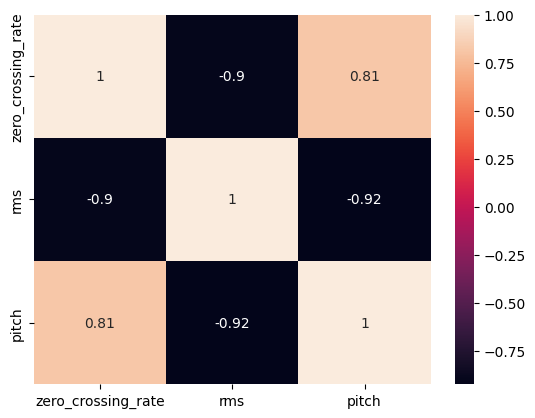

In [114]:
# Correlación Masculina

mask = dataset_features.genero == 'masculino'
sns.heatmap(dataset_features[mask].loc[:, ['zero_crossing_rate', 'rms', 'pitch']].corr(), annot=True)

<Axes: >

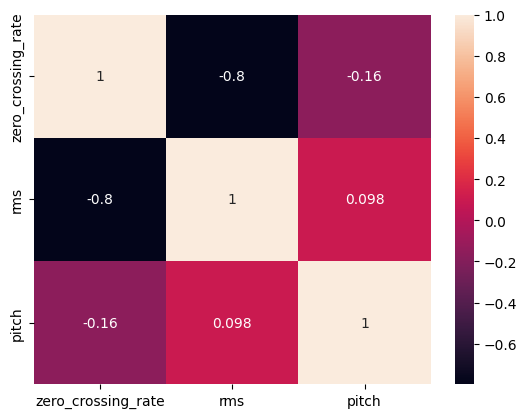

In [115]:
# Correlación Femenina

mask = dataset_features.genero == 'femenino'
sns.heatmap(dataset_features[mask].loc[:, ['zero_crossing_rate', 'rms', 'pitch']].corr(), annot=True)

<Axes: >

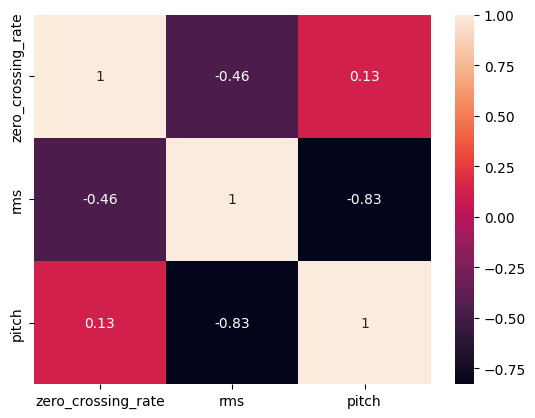

In [116]:
# Correlación Completa

sns.heatmap(dataset_features.loc[:, ['zero_crossing_rate', 'rms', 'pitch']].corr(), annot=True)

In [117]:
dataset_features.sort_values('zero_crossing_rate').to_excel(
    'voces_test_rms.ods',
    index=False,
    engine='odf'
) #, engine='odf'

In [118]:
mask = dataset_features.genero == 'femenino'
dataset_features[mask].sort_values('zero_crossing_rate').to_excel(
    'voces_femenina_rms.ods',
    index=False,
    engine='odf'
) 

In [119]:
mask = dataset_features.genero == 'masculino'
dataset_features[mask].sort_values('zero_crossing_rate').to_excel(
    'voces_masculina_rms.ods',
    index=False,
    engine='odf'
) 